## Import Dependencies

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats

## Analysis

In [13]:
### File Path and Read Files ###
cars_sales_model = pd.read_csv("../csv/2020_US_AUTO_SALES_BY_MODEL.csv")
cars_sales_manu = pd.read_csv("../csv/US_SALES_BY_MANUFACTURER.csv")
cars_sales_by_state = pd.read_csv("../csv/Car_sales_by_state.csv")
covid = pd.read_csv("../csv/covid_us_county.csv")
infection_rate = pd.read_csv("../csv/Infection_rate.csv")

In [14]:
covid

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0
...,...,...,...,...,...,...,...,...,...
1834753,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-18,664,WY,6
1834754,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-19,665,WY,6
1834755,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-21,669,WY,6
1834756,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-22,670,WY,6


In [15]:
# COVID Cases Summary
covid[['cases']].describe()

,cases
count,1.834758e+06
mean,4.305699e+03
std,2.183764e+04
min,0.000000e+00
25%,1.900000e+01
50%,4.630000e+02
75%,2.242000e+03
max,1.276254e+06


In [16]:
covid_states_group = covid.groupby(['state'])

In [17]:
# COVID Cases by State
covid_states_count = covid_states_group['cases'].count().to_frame()
covid_states_count

,cases
state,
Alabama,37881
Alaska,18117
American Samoa,549
Arizona,9333
Arkansas,42273
California,32940
Colorado,36234
Connecticut,5490
Delaware,2745


In [18]:
# COVID Cases by Most State Cases
covid_states_count.sort_values(by='cases',ascending=False)

,cases
state,
Texas,140544
Georgia,88389
Virginia,74115
Kentucky,66978
Missouri,64782
Kansas,58743
Illinois,57096
North Carolina,55998
Iowa,55449


In [19]:
covid_states = covid_states_count.reset_index()
covid_states.head()

,state,cases
0,Alabama,37881
1,Alaska,18117
2,American Samoa,549
3,Arizona,9333
4,Arkansas,42273


In [20]:
infection_rate = infection_rate[['state',"Infection Rate"]]

In [21]:
covid_car_sales = cars_sales_by_state.merge(covid_states,left_on='State',right_on='state',how='inner')
# Oklahoma has car sales data but no covid cases data
del covid_car_sales['state']
covid_car_sales = covid_car_sales.merge(infection_rate,left_on='State',right_on='state',how='inner')
del covid_car_sales['state']
covid_car_sales

,State,All Dealerships ($ millions),Average per Dealership ($ thousands),Year,cases,Infection Rate
0,Alabama,13129,48267,2020,37881,1.693573
1,Alaska,1599,59235,2020,18117,4.430760
2,Arizona,22320,90732,2020,9333,7.873393
3,Arkansas,8117,38652,2020,42273,1.490587
4,California,107722,83961,2020,32940,3.230023
5,Colorado,15129,61250,2020,36234,1.309523
6,Connecticut,9828,39788,2020,5490,2.836209
7,Delaware,3032,57199,2020,2745,6.729557
8,Florida,83038,94577,2020,37881,2.485462
9,Georgia,29728,60669,2020,88389,0.987396


The r-value is 0.43


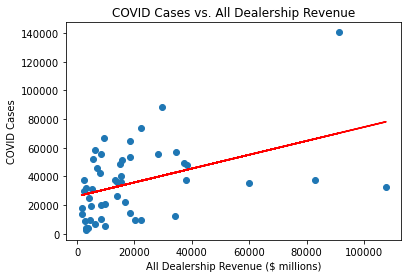

In [22]:
### All Dealership Revenue vs. COVID Cases ###
x = covid_car_sales['All Dealerships ($ millions)']
y = covid_car_sales['cases']
corr = scipy.stats.pearsonr(x, y)
print(f"The r-value is {round(corr[0],2)}")
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = x * slope + intercept
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,regress_values,"r-")
plt.title("COVID Cases vs. All Dealership Revenue")
plt.xlabel("All Dealership Revenue ($ millions)")
plt.ylabel("COVID Cases")
plt.show()

The r-value is -0.02


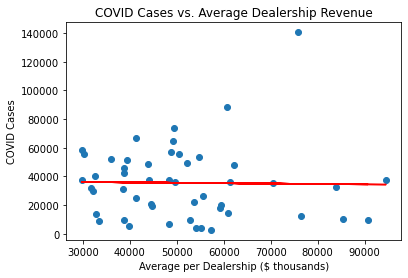

In [23]:
### Average Dealership Revenue ### 
x = covid_car_sales['Average per Dealership ($ thousands)']
y = covid_car_sales['cases']
corr = scipy.stats.pearsonr(x, y)
print(f"The r-value is {round(corr[0],2)}")
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = x * slope + intercept
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,regress_values,"r-")
plt.title("COVID Cases vs. Average Dealership Revenue")
plt.xlabel("Average per Dealership ($ thousands)")
plt.ylabel("COVID Cases")
plt.show()

The r-value is -0.38


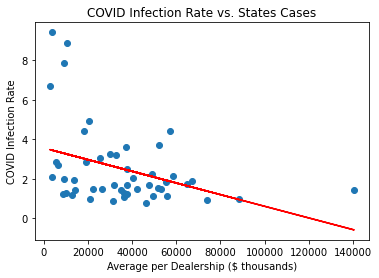

In [26]:
### cases vs Infection Rate Revenue ### 
x = covid_car_sales['cases']
y = covid_car_sales['Infection Rate']
corr = scipy.stats.pearsonr(x, y)
print(f"The r-value is {round(corr[0],2)}")
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = x * slope + intercept
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,regress_values,"r-")
plt.title("COVID Infection Rate vs. States Cases")
plt.xlabel("Average per Dealership ($ thousands)")
plt.ylabel("COVID Infection Rate")
plt.show()